In [1]:
import pandas as pd #handle files, database etc.

In [3]:
dataset = pd.read_csv("Social_Network_Ads.csv") #read the csv file using pandas library

dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
#data preprocessing - because categorial data can't be handle so we modify the data into numerical data using one hot encoding(Nominal)

dataset = pd.get_dummies(dataset, drop_first=True) #"drop_first=True" removes 1st category of each categorical column

dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [7]:
boolean_columns = dataset.select_dtypes(include=['bool']).columns #get boolean type column data from the dataset and store it in boolean_columns variable
#print(boolean_columns)

dataset[boolean_columns] = dataset[boolean_columns].astype(int) #convert boolean column dataset to 0's and 1's
#print(dataset[boolean_columns])

In [9]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [11]:
dataset = dataset.drop("User ID", axis=1) #removing "User ID" feature using drop method. "axis=1" represent removing the "COLUMN"

dataset

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [13]:
dataset["Purchased"].value_counts() #value_counts method calculates the purchased and not purchased value of "Purchased" column

Purchased
0    257
1    143
Name: count, dtype: int64

In [15]:
dataset.columns #return column names present in the dataset variable

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [17]:
independent = dataset[['Age', 'EstimatedSalary', 'Gender_Male']] #input features

dependent = dataset[['Purchased']] #output feature

In [19]:
#split training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [23]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(splitter='best', criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
import pandas as pd
import numpy as np

# Feature importances
importances = classifier.feature_importances_
features = ["Age", "EstimatedSalary", "Gender_Male"]

# Display as DataFrame
pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)


,Feature,Importance
1,EstimatedSalary,0.516310
0,Age,0.450644
2,Gender_Male,0.033046


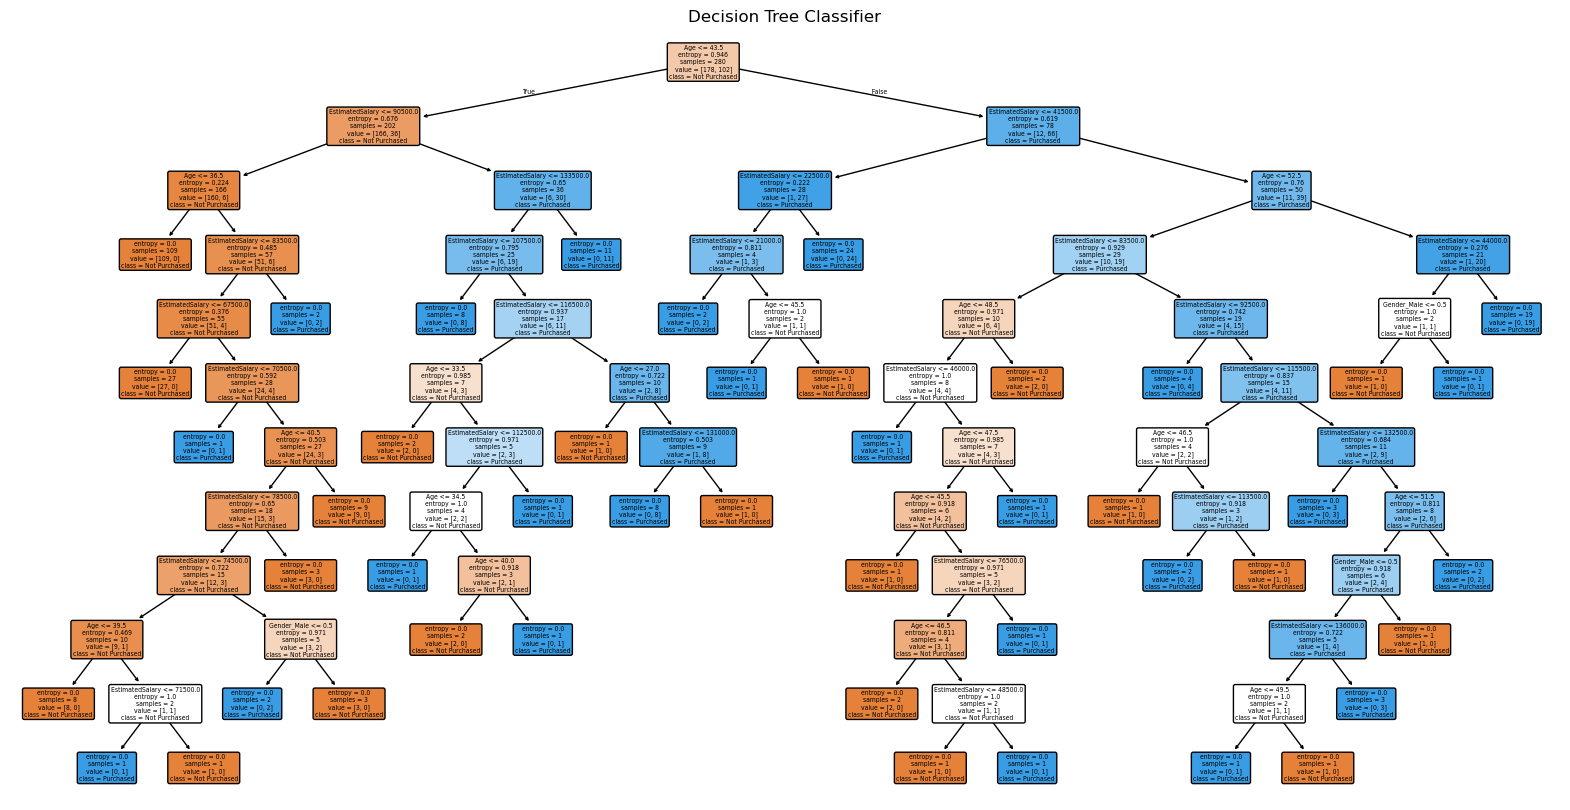

In [53]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(classifier, feature_names=["Age", "EstimatedSalary", "Gender_Male"],
          class_names=["Not Purchased", "Purchased"],
          filled=True,
          rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

In [37]:
y_pred = classifier.predict(X_test) #predicting the model based on test data

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[71,  8],
       [ 3, 38]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred) #generation classification report

print(clf_report)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        79
           1       0.83      0.93      0.87        41

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120



In [43]:
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [45]:
#save the model using pickle library

import pickle
fileName = "finalized_model_decision_tree_classification.sav"
pickle.dump(classifier, open(fileName, "wb")) #saved model available in regressor variable. Now storing that variable into fileName

In [51]:
loaded_model = pickle.load(open("finalized_model_decision_tree_classification.sav", "rb"))
result = loaded_model.predict([[40, 84000, 0]])

result

C:\Users\sethu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)